In [59]:
!rm -rf ojt_bert
!git clone https://github.com/wzwzeyal/ojt_bert

Cloning into 'ojt_bert'...
remote: Enumerating objects: 194, done.
remote: Counting objects: 100% (194/194), done.
remote: Compressing objects: 100% (138/138), done.
remote: Total 194 (delta 86), reused 155 (delta 50), pack-reused 0
Receiving objects: 100% (194/194), 6.77 MiB | 12.62 MiB/s, done.
Resolving deltas: 100% (86/86), done.


In [60]:
!rm -rf gsdmm
!git clone https://github.com/rwalk/gsdmm.git

Cloning into 'gsdmm'...
remote: Enumerating objects: 62, done.
remote: Total 62 (delta 0), reused 0 (delta 0), pack-reused 62
Unpacking objects: 100% (62/62), done.


In [61]:
from gsdmm.gsdmm import MovieGroupProcess

In [62]:
import pandas as pd
import numpy as np

In [63]:
all_tokens_df = pd.read_csv('./ojt_bert/data/for_topic/all_tokens_df.gz')
all_morphs_df = pd.read_csv('./ojt_bert/data/for_topic/all_morphs_df.gz')


In [64]:
# MGP Topic

In [65]:
all_tokens_df['topic_list'] = all_tokens_df['topic'].map(lambda x: x.split(' '))

In [66]:
all_tokens_df.head()

,Unnamed: 0,index,comment,label,comment_clean,sentiment,comment_clean_len,topic,topic_len,topic_list
0,0,0,ממש כואב ..... אני בוכה עם המשפחה שלא תדעו עוד צער,0,ממש כואב אני בוכה עם המשפחה שלא תדעו עוד צער,pos,44,כואב בוכה המשפחה תדעו צער,25,"[כואב, בוכה, המשפחה, תדעו, צער]"
1,1,1,כל הכבוד והמון בהצלחה,0,כל הכבוד והמון בהצלחה,pos,21,והמון,5,[והמון]
2,2,2,"תל חי , רובי . בכל העצב הזה היית קרן אור של תקוה . אכן יש נשיא בישראל",0,תל חי רובי בכל העצב הזה היית קרן אור של תקוה אכן יש נשיא בישראל,pos,63,תל חי העצב היית אור תקוה אכן בישראל,35,"[תל, חי, העצב, היית, אור, תקוה, אכן, בישראל]"
3,3,3,נקי כפיים ובר לבב בהצלחה לך ולנו .,0,נקי כפיים ובר לבב בהצלחה לך ולנו,pos,32,נקי כפיים ובר לבב ולנו,22,"[נקי, כפיים, ובר, לבב, ולנו]"
4,4,4,רובי חג שמח והצלחה בבחירות לנשיאות .,0,רובי חג שמח והצלחה בבחירות לנשיאות,pos,34,חג והצלחה בבחירות לנשיאות,25,"[חג, והצלחה, בבחירות, לנשיאות]"


In [67]:
mgp = MovieGroupProcess(K=10, alpha=0.1, beta=0.1, n_iters=10)

In [68]:
docs = all_tokens_df.topic_list.values

vocab = set(x for doc in docs for x in doc)
n_terms = len(vocab)
n_docs = len(docs)

# Fit the model
y = mgp.fit(docs, n_terms)

In stage 0: transferred 5020 clusters with 10 clusters populated
In stage 1: transferred 3441 clusters with 10 clusters populated
In stage 2: transferred 2720 clusters with 10 clusters populated
In stage 3: transferred 2141 clusters with 10 clusters populated
In stage 4: transferred 1862 clusters with 10 clusters populated
In stage 5: transferred 1673 clusters with 10 clusters populated
In stage 6: transferred 1555 clusters with 10 clusters populated
In stage 7: transferred 1480 clusters with 10 clusters populated
In stage 8: transferred 1434 clusters with 10 clusters populated
In stage 9: transferred 1376 clusters with 10 clusters populated


In [69]:
def top_words(distribution, top_index, num_words):
    '''
    Returns the top words in each cluster based on occources.
    '''
    for topic in top_index:
        pairs = sorted([(k, v) for k, v in distribution[topic].items()], key=lambda x: x[1], reverse=True)
        print(f"Cluster {topic} : {pairs[:num_words]}")
        print('-'*120)

In [70]:
doc_count = np.array(mgp.cluster_doc_count)
print('Number of documents per topics :', doc_count)
print('*'*70)

# Topics sorted by document inside
top_index = doc_count.argsort()[-15:][::-1]
print('Most important clusters (by number of docs inside):', top_index)
print('*'*70)


# Show the top 15 words by cluster, it helps to make the topic_dict below
top_words(mgp.cluster_word_distribution, top_index, 15)

Number of documents per topics : [ 527  548  451  321 2344  505  339  501  337  386]
**********************************************************************
Most important clusters (by number of docs inside): [4 1 0 5 7 2 9 6 8 3]
**********************************************************************
Cluster 4 : [('איש', 205), ('לנשיא', 188), ('יחי', 188), ('יקר', 161), ('הצלחה', 159), ('ראוי', 145), ('אדוני', 128), ('ראובן', 103), ('בך', 98), ('העם', 97), ('עלה', 97), ('היקר', 96), ('ברכות', 94), ('והצלח', 91), ('ישר', 86)]
------------------------------------------------------------------------------------------------------------------------
Cluster 1 : [('התבוללות', 48), ('העם', 41), ('יהודי', 38), ('היהודי', 33), ('ערבי', 33), ('להתחתן', 31), ('יהודיה', 30), ('אסור', 27), ('ממך', 23), ('חופש', 22), ('היית', 22), ('להפגין', 22), ('מדינה', 22), ('אדוני', 21), ('במדינה', 21)]
---------------------------------------------------------------------------------------------------------------

In [74]:
# created by hand so that the topic names refer to the above clusters
topic_dict = {}
topic_names = ['Greetings', #4
               'Politics', #1
               'Eulogies', #0
               'Politics', #5
               'Politics', #7
               'Greetings',#2               
               'Politics', #9
               'Greetings', #6
               'Politics', #8
               'Politics', ]#3]

for i, topic_num in enumerate(top_index):
    topic_dict[topic_num]=topic_names[i]

In [75]:
# assign clusters into the dataframe 
all_tokens_df['cluster_name'] = pd.Series([topic_dict[int(x)] for x in y], index=all_tokens_df.index)
all_tokens_df['cluster_number'] = pd.Series(y, index=all_tokens_df.index)
all_tokens_df['cluster_name'].value_counts()

Greetings    3134
Politics     2598
Eulogies      527
Name: cluster_name, dtype: int64

In [89]:
# topic clustering exampls 
for i in set(topic_names):
    display(all_morphs_df[all_morphs_df['cluster_name'] == i][['comment','cluster_name','cluster_number']].sample(2))

,comment,cluster_name,cluster_number
4935,ביזיון ... תלמדו את ה היסטוריה של ה עם ה יהודי א ״ כ תדברו על דמוקרטיה,Politics,7
1598,עוד נשיא מושפל קצב אנס ו אתה אונס את ה חברה !!!,Politics,3


,comment,cluster_name,cluster_number
5614,גיבור וירטואלי .,Eulogies,0
5600,ה לב מסרב לקבל את ל קחיתם של פרחים קטנים ש לא הספיקו לפרוח ו לשמוח יהי זכרו ב רוך נשמה יקרה ו מי...,Eulogies,0


,comment,cluster_name,cluster_number
3650,אתה מלך שבת שלום,Greetings,4
3668,"תודה רבה כבוד ה נשיא : ) ב תקווה ש ב ארצנו ה קטנטונת אנשים יוכלו להתחתן עם בחירי לבם , ו לא עם ...",Greetings,9


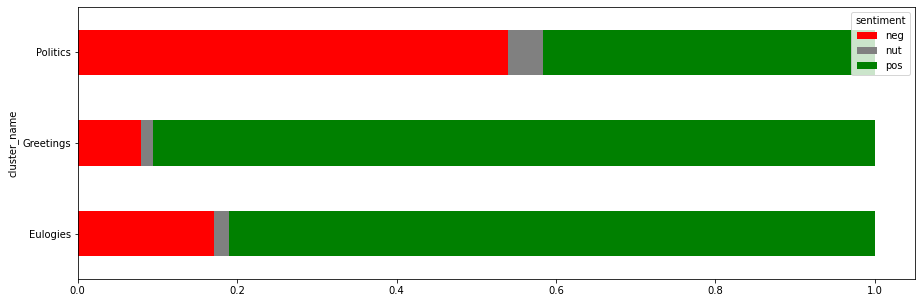

In [79]:
group_by_sentiment = all_tokens_df.groupby('cluster_name')['sentiment'].value_counts(normalize=True)
group_by_sentiment.unstack().plot.barh(stacked=True, color=['red', 'gray', 'green'] );

In [81]:
all_morphs_df['topic_list'] = all_morphs_df['topic'].map(lambda x: x.split(' '))

In [82]:
docs = all_morphs_df.topic_list.values

vocab = set(x for doc in docs for x in doc)
n_terms = len(vocab)
n_docs = len(docs)

# Fit the model
y = mgp.fit(docs, n_terms)

In stage 0: transferred 5644 clusters with 10 clusters populated
In stage 1: transferred 1536 clusters with 10 clusters populated
In stage 2: transferred 1024 clusters with 10 clusters populated
In stage 3: transferred 984 clusters with 10 clusters populated
In stage 4: transferred 998 clusters with 10 clusters populated
In stage 5: transferred 994 clusters with 10 clusters populated
In stage 6: transferred 980 clusters with 10 clusters populated
In stage 7: transferred 982 clusters with 10 clusters populated
In stage 8: transferred 981 clusters with 10 clusters populated
In stage 9: transferred 956 clusters with 10 clusters populated


In [83]:
doc_count = np.array(mgp.cluster_doc_count)
print('Number of documents per topics :', doc_count)
print('*'*70)

# Topics sorted by document inside
top_index = doc_count.argsort()[-15:][::-1]
print('Most important clusters (by number of docs inside):', top_index)
print('*'*70)


# Show the top 15 words by cluster, it helps to make the topic_dict below
top_words(mgp.cluster_word_distribution, top_index, 15)

Number of documents per topics : [1066 1140  911  656 4649  988  650 1005  686  784]
**********************************************************************
Most important clusters (by number of docs inside): [4 1 0 7 5 2 9 8 3 6]
**********************************************************************
Cluster 4 : [('איש', 490), ('יקר', 426), ('יחי', 383), ('ראוי', 378), ('אדוני', 262), ('ראובן', 216), ('עלה', 195), ('ישר', 189), ('לנשיא', 188), ('ברכות', 184), ('אמן', 168), ('הצלחה', 159), ('תפקיד', 156), ('כוח', 146), ('נשיאנו', 144)]
------------------------------------------------------------------------------------------------------------------------
Cluster 1 : [('התבוללות', 162), ('ערבי', 85), ('יהודים', 71), ('להתחתן', 68), ('יהודיה', 68), ('אסור', 65), ('חופש', 57), ('ערבים', 55), ('דמוקרטיה', 55), ('דת', 50), ('היית', 49), ('יהודית', 47), ('לחיות', 46), ('גזענות', 45), ('אדוני', 44)]
------------------------------------------------------------------------------------------------

In [84]:
# created by hand so that the topic names refer to the above clusters
topic_dict = {}
topic_names = ['Greetings', #4
               'Politics', #1
               'Eulogies', #0
               'Politics', #7
               'Politics', #5
               'Greetings', #2
               'Greetings',#2               
               'Politics', #9
               'Politics', #8
               'Politics', #3
               'Greetings', ]#6]

for i, topic_num in enumerate(top_index):
    topic_dict[topic_num]=topic_names[i]

In [85]:
# assign clusters into the dataframe 
all_morphs_df['cluster_name'] = pd.Series([topic_dict[int(x)] for x in y], index=all_morphs_df.index)
all_morphs_df['cluster_number'] = pd.Series(y, index=all_morphs_df.index)
all_morphs_df['cluster_name'].value_counts()

Greetings    3163
Politics     2574
Eulogies      539
Name: cluster_name, dtype: int64

In [92]:
# topic clustering exampls 
for i in set(topic_names):
    display(all_morphs_df[all_morphs_df['cluster_name'] == i][['comment','cluster_name','cluster_number']].sample(2))

,comment,cluster_name,cluster_number
3394,Yaniv Frizlander זה הזכיר ל אני את אתה : ),Politics,8
92,"ה אישה התאסלמה , אז היא ערבייה . למה זה צריך להפריע ל מישהו !!!!!????",Politics,1


,comment,cluster_name,cluster_number
2824,אמן . כל כך עצוב,Eulogies,0
960,עצוב כואב !!!!,Eulogies,0


,comment,cluster_name,cluster_number
4977,אשת חייל !!!!! שכנה מקסימה !!!!!!!!,Greetings,4
1211,כמה נוגע ל ה לב,Greetings,4


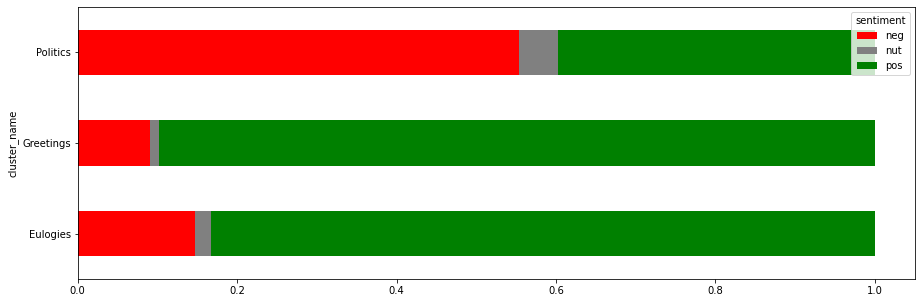

In [90]:
group_by_sentiment = all_morphs_df.groupby('cluster_name')['sentiment'].value_counts(normalize=True)
group_by_sentiment.unstack().plot.barh(stacked=True, color=['red', 'gray', 'green'] );